<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import utils
from utils import LAMMPS
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load Colloid from C++ code
from utils import Colloid

c = Colloid()
c.load('../examples/initialize_colloid/colloid.json')

# Always save the Colloid object so you have the mapping of types
c.save('colloid.pkl')

In [3]:
# Step 2a: Create a mixture of a set of different enantiomorphs
buffer = 0.5
box = [10, 10]
n_each = [8, 8]
coords_, types_ = LAMMPS.tile(c, box, buffer, n=n_each)

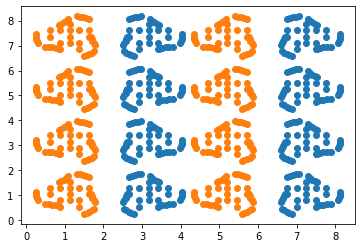

In [4]:
# Step 2b: Let's color by chirality
from utils import Analysis

l = len(c.coords)
end = l
while end <= len(coords_):
    x = Analysis.identify_chirality(
        Analysis.unwrap(c.coords, box), 
        Analysis.unwrap(coords_[end-l:end], box)
    )

    plt.plot(coords_[end-l:end,0], coords_[end-l:end,1], 'o', color='C{}'.format(int(x)))
    end += l

In [5]:
# Step 3: Turn that into a LAMMPS file to read
LAMMPS.create_initial_configuration(
    c, 
    box, 
    buffer, 
    n_each, 
    'init_config.lammps'
)

In [7]:
# Step 4: Record the potential for each pair of particles
LAMMPS.tabulate_potentials(
    c,
    filename='potentials.lammps', 
    alpha=6, 
    bins=50
)